In [2]:
import numpy as np

In [3]:
n = 501
x0 = n * 0.5
x = np.arange(n)

In [4]:
from matplotlib import pyplot as plt

y = 1 / (1000 + (x - x0)**2)

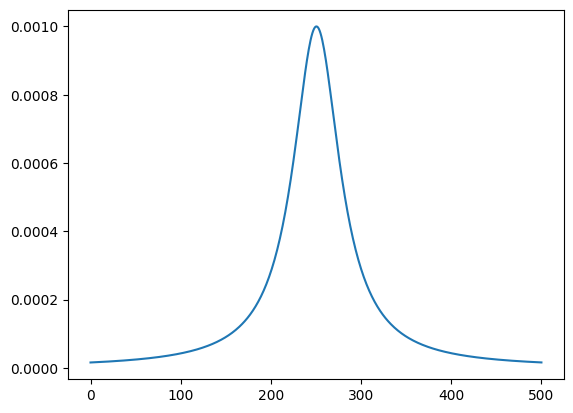

In [5]:
plt.plot(x, y)

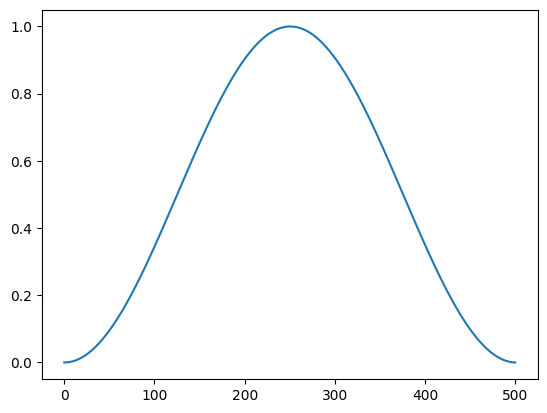

In [6]:
w = 0.5 - 0.5 * np.cos(x / n * 2 *  np.pi)
plt.plot(x, w)

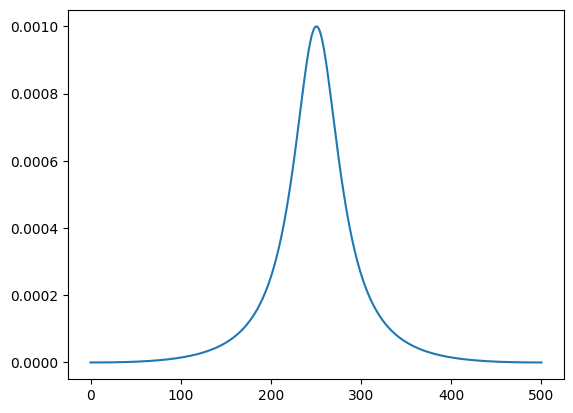

In [7]:
z2 = w * y
plt.plot(x, z2)

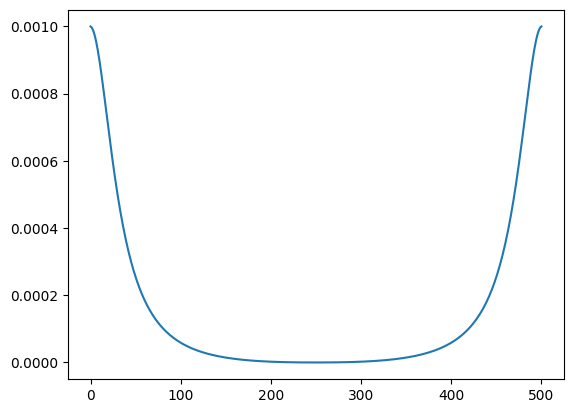

In [8]:
from numpy import fft as fft
z = fft.fftshift(z2)
plt.plot(x, z)

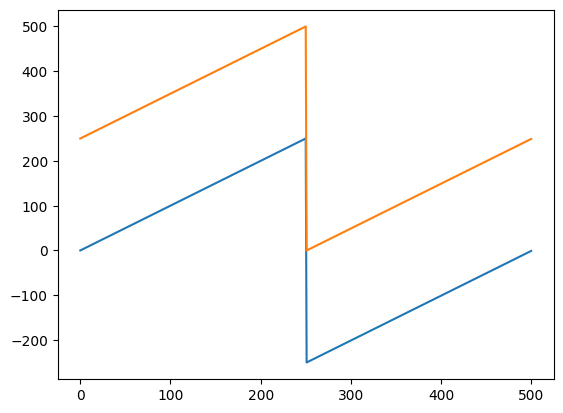

In [9]:
def wavenum(i) : return (i + n // 2) % n - n // 2
plt.plot(x, wavenum(x), x, fft.ifftshift(x))

In [10]:
delta = 27
H = np.exp(-2j * wavenum(x) / n * np.pi * delta)
if n & 1:
    idx0, idx1 = n//2, 1 + n//2
    #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
    print("wavenums", wavenum(idx0), wavenum(idx1))
    print("H:", H[idx0], H[idx1])
else :
    idx0 = n//2
    ambiguous = np.exp(-2j * (n//2) / n * np.pi * delta)
    print("H:", H[idx0], ambiguous)
    H[idx0] = 0.5 * (ambiguous + 1/ambiguous)
    print("new H:", H[idx0])
#print(H[0], H[-1], "ambiguous", ambiguous)
#print("angles: ", np.angle(H[-1]), np.angle(ambiguous))

wavenums 250 -250
H: (-0.985701708140154-0.16849968121507744j) (-0.985701708140154+0.16849968121507744j)


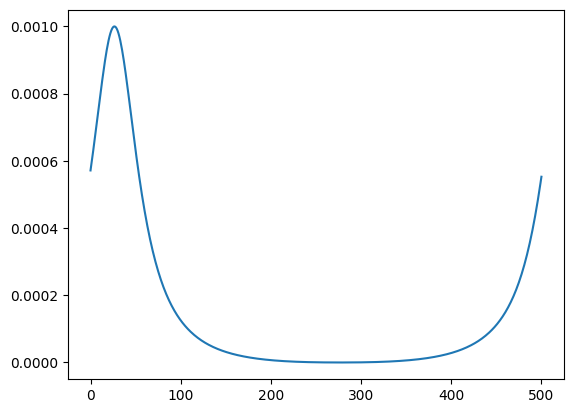

In [11]:
z_shifted = fft.ifft(H * fft.fft(z))
plt.plot(x, np.real(z_shifted))

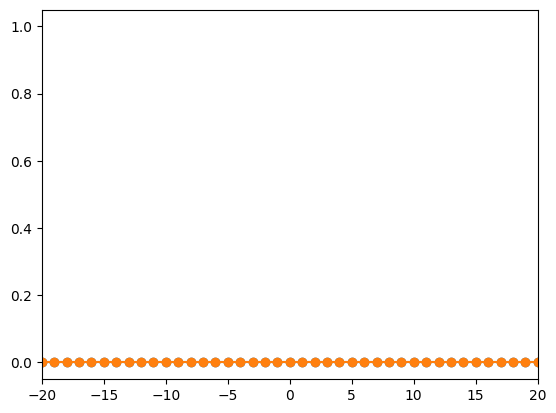

In [12]:
impulse_response = fft.ifft(H * 1)
plt.xlim([-20,20])
plt.plot(np.arange(n) - n//2, fft.fftshift(np.real(impulse_response)), np.arange(n) - n//2, fft.fftshift(np.imag(impulse_response)), marker = 'o')